In [1]:
import librosa
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy.signal as sp
from scipy.signal import butter, lfilter, freqz

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
s, sr = librosa.load('v5.wav', sr=16000)

In [4]:
def plot_spectrogram(s, sr):
    stft = np.abs(librosa.stft(s))
    fig = plt.figure(figsize=(10, 5))
    plt.specgram(s, Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequencies')
    plt.title('Spectrogram of signal ')

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


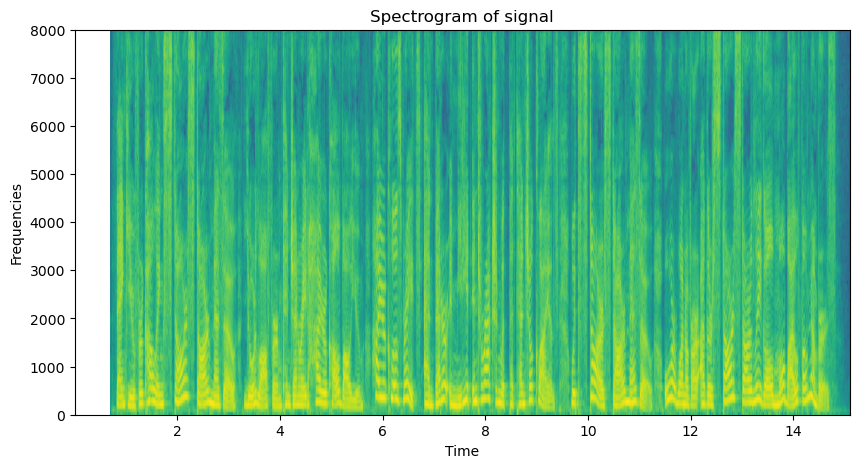

In [5]:
plot_spectrogram(s, sr)

In [6]:
def fft_convolution(x, h):
    Nx = x.shape[0]
    Nh = h.shape[0]
    Ny = Nx + Nh - 1

    K = max(Nx, Nh)

    X = np.fft.fft(np.pad(x, (0, K-Nx), 'constant'))
    H = np.pad(h, (0, K-Nh), 'constant')

    Y = np.multiply(X, H)
    y = np.fft.irfft(Y)
    return y[:Ny]

In [7]:
def equalize(s, window_func, B, h):
    M = len(s)
    N = len(h)

    num_input_blocks = np.ceil(M / B).astype(int)

    xp = np.pad(s, (0, num_input_blocks*B - M), 'constant')

    output_size = num_input_blocks * B + N - 1
    y = np.zeros((output_size,))
    for n in range(num_input_blocks):
        xb = xp[n*B:(n+1)*B]
        window = window_func(xb.shape[0])
        xb *= window
        
        u = fft_convolution(xb, h)

        y[n*B:n*B+len(u)] += u

    return y[:M+N-1]



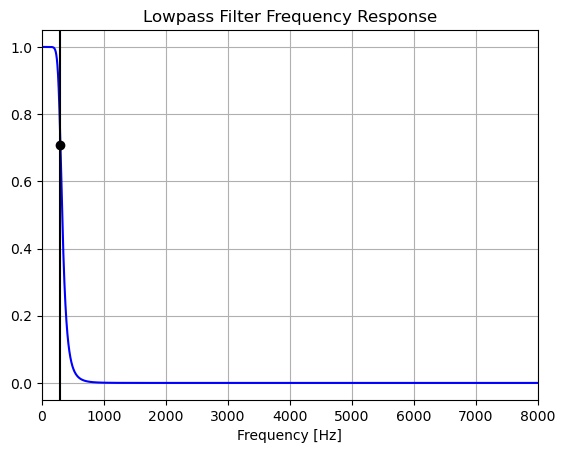

In [8]:
order = 6
fs = 16000
cutoff = 300
btype='lowpass'
b, a = butter(order, cutoff, fs=fs, btype=btype, analog=False)
w, h = freqz(b, a, fs=fs, worN=fs//2)

plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [9]:
frames = 2048
window_func = np.hanning

y = equalize(s, window_func, frames, h)

In [10]:
ipd.Audio(y, rate=sr)